C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (1).jpg
[5.142042791561607e-09, 1.0]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (10).jpg
[1.2822482631236198e-08, 1.0]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (11).jpg
[0.9999828338623047, 1.7142865544883534e-05]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (12).jpg
[0.9999998807907104, 7.306521609962147e-08]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (13).jpg
[0.996625542640686, 0.0033744757529348135]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (14).jpg
[0.995062530040741, 0.004937453661113977]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (15).jpg
[0.9999269247055054, 7.301611185539514e-05]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (16).jpg
[0.9999986886978149, 1.2912206557302852e-06]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (2).jpg
[0.0016056722961366177, 0.9983943104743958]
C:\Users\bjon6\Documents\src\Temp Testing Data\TEMP (3).jpg
[0.03301228582859039, 0.966

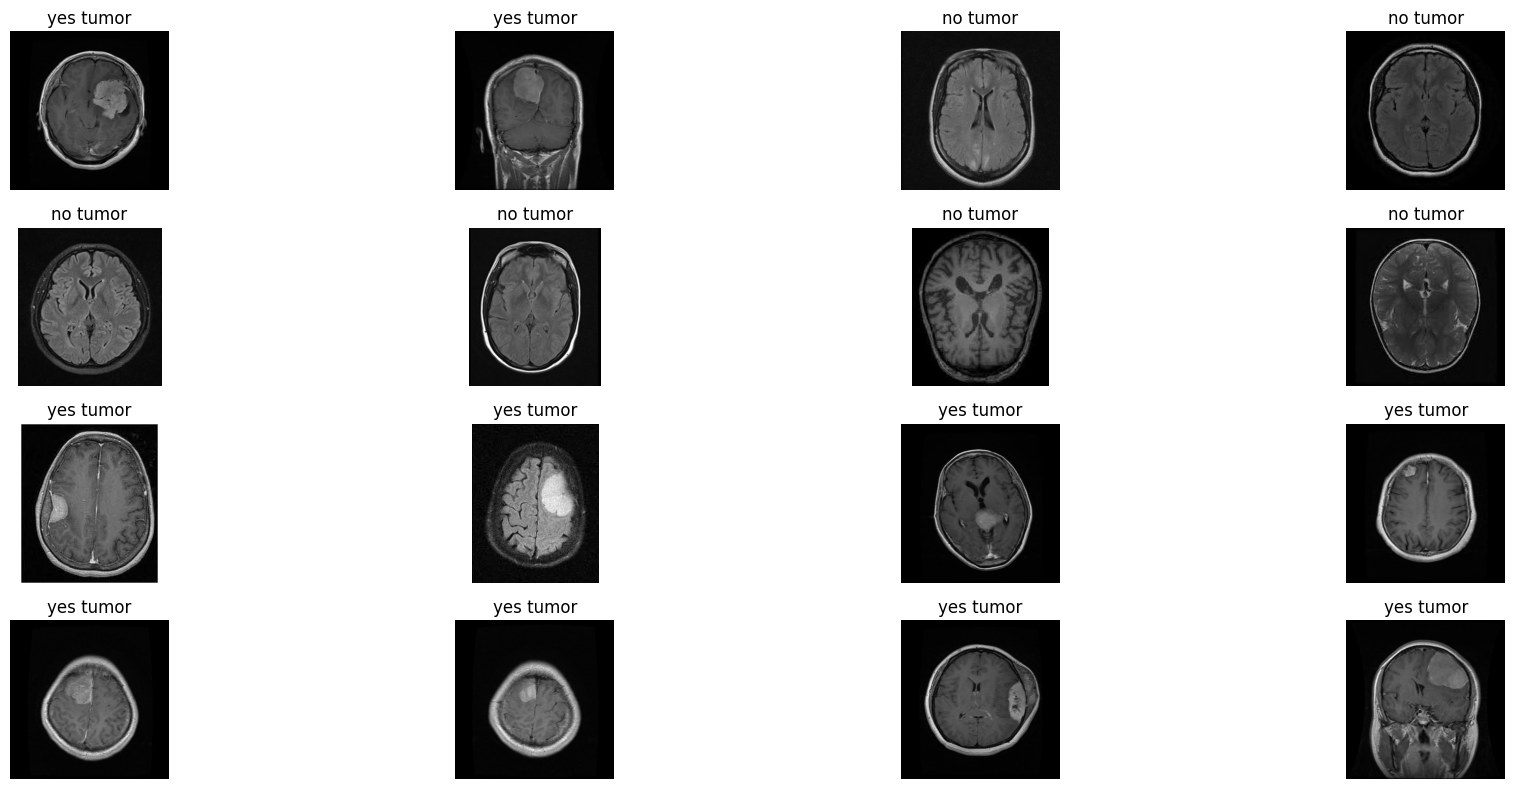

In [12]:
from model_training import model, dataset_classes
from imports import *

model.eval()
image_scale = (64, 64)

transform = transforms.Compose([ #Converting images to 64x64 greyscale
        transforms.Grayscale(), 
        transforms.Resize(image_scale), 
        transforms.ToTensor()
    ])

fp = r"C:\Users\bjon6\Documents\src\Temp Testing Data"
images = [f for f in os.listdir(fp) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]


plt.figure(figsize=(20,8))
cols = 4 #Num of images testing 4 * 4 = 16
rows = 4

CONFIDENCE = 0.85

i = 0
for img in images:
    img_path = os.path.join(fp, img)
    img = Image.open(img_path)
    print(img_path)
    input_tensor = transform(img).unsqueeze(0)
    
    with torch.no_grad():
        out = model(input_tensor)
        probs = torch.softmax(out, dim=1)[0] #[Prob it is not a Tumor, Prob it is a Tumor]
        print(probs.tolist())
        _, pred = torch.max(out, 1)
    pred_label = dataset_classes[pred.item()]

    plt.subplot(rows, cols, i+1)
    img_array = np.array(img)
    plt.imshow(img_array, cmap='gray')
    
    if probs[1] > CONFIDENCE:
        plt.title("yes tumor")
    else:
        plt.title("no tumor")
    plt.axis('off')
    i += 1
    
plt.tight_layout()
plt.show()